# Telecom Churn case study using PCA and Ensemble

### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

### Goal
It is your job to predict if a customer will churn, given the ~170 columns containing customer behavior, usage patterns, payment patterns, and other features that might be relevant. Your target variable is "churn_probability"
Note: Make sure your accuracy is greater than the sample submission that is present in the leaderboard

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

## Step 1. Reading, Understanding and Visualizing the data

In [2]:
telecom_train_df = pd.read_csv('train (1).csv')
telecom_test_df = pd.read_csv('test (1).csv')

In [3]:
telecom_train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
telecom_test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [5]:
telecom_train_df.shape

(69999, 172)

In [6]:
telecom_test_df.shape

(30000, 171)

In [7]:
telecom_train_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [8]:
telecom_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [9]:
telecom_train_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [10]:
telecom_train_df.isna().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [11]:
telecom_train_df.dtypes

id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object

In [12]:
# Columns which we have to impute as Zero as thy should not be dropped based on missing values becuase they are important.
rech_cols_to_impute = [x for x in telecom_train_df.columns if 'rech' in x and 
                       'count' not in x and 'date' not in x and 'num' not in x]
telecom_train_df[rech_cols_to_impute] = telecom_train_df[rech_cols_to_impute].apply(lambda x: x.fillna(0))
telecom_test_df[rech_cols_to_impute] = telecom_test_df[rech_cols_to_impute].apply(lambda x: x.fillna(0))


### Dropping rows for both train and test datasets
 - Rows which are empty

In [13]:
telecom_train_df.dropna(axis=0, how='all', inplace=True)
telecom_test_df.dropna(axis=0, how='all', inplace=True)

In [14]:
print(telecom_train_df.shape)
print(telecom_test_df.shape)

(69999, 172)
(30000, 171)


### Dropping columns for both train and test datasets

    - Not needed columns like Id, last_date_of_month_6 etc.
    - Columns having more than 70% values as null

In [15]:
# For us dates doesn't matter as long as customer is doing a recharge.
cols_to_delete = ['id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                  'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
                  'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'
                 ]
telecom_train_df.drop(cols_to_delete, axis=1, inplace=True)
telecom_test_df.drop(cols_to_delete, axis=1, inplace=True)

In [16]:
# to check the % of null values
round((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index)),2)[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values()

arpu_3g_8           0.74
night_pck_user_8    0.74
night_pck_user_7    0.74
arpu_2g_8           0.74
arpu_2g_7           0.74
fb_user_7           0.74
arpu_3g_7           0.74
fb_user_8           0.74
count_rech_3g_8     0.74
count_rech_3g_7     0.74
count_rech_2g_8     0.74
count_rech_2g_7     0.74
arpu_2g_6           0.75
count_rech_3g_6     0.75
night_pck_user_6    0.75
fb_user_6           0.75
arpu_3g_6           0.75
count_rech_2g_6     0.75
dtype: float64

In [17]:
# count of missing data > 70% columns in train dataset
len(round((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index)),2)[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values())

18

In [18]:
# count of missing data > 70% columns in test dataset
len(round((pd.isnull(telecom_test_df).sum()/len(telecom_test_df.index)),2)[pd.isnull(telecom_test_df).sum()/ len(telecom_test_df.index) > 0.70].sort_values())

18

### As we have more than 70% data as null for 18 columns in train and test, we are dropping these columns from dataset.

In [19]:
cols_to_delete = ((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index))[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values()).keys()

In [20]:
cols_to_delete = cols_to_delete.to_list()
print(cols_to_delete)

['arpu_3g_8', 'night_pck_user_8', 'arpu_2g_8', 'count_rech_3g_8', 'fb_user_8', 'count_rech_2g_8', 'arpu_3g_7', 'fb_user_7', 'arpu_2g_7', 'night_pck_user_7', 'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_3g_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'count_rech_2g_6']


In [21]:
telecom_train_df = telecom_train_df.drop(cols_to_delete, axis=1)

In [22]:
telecom_train_df.shape

(69999, 144)

In [23]:
telecom_test_df = telecom_test_df.drop(cols_to_delete, axis=1)

In [24]:
telecom_test_df.shape

(30000, 143)

## Lets check the data types of columns now

In [25]:
telecom_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Columns: 144 entries, circle_id to churn_probability
dtypes: float64(117), int64(27)
memory usage: 77.4 MB


In [26]:
telecom_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Columns: 143 entries, circle_id to jun_vbc_3g
dtypes: float64(117), int64(26)
memory usage: 33.0 MB


### We can see now we don't have any categorical data, all are numerical data only.

### Imputing the na values with
 - Median for numerical variables
 - Mode for categorical variables - Not needed in out this case.

In [27]:
# A generic method to impute na
def replace_na(df, columns, data_type):
    for col in columns:
        if data_type == 'categorical':
            value = pd.to_datetime(df[col]).mode()
        else:
            value = df[col].median()
        df[col].fillna(value, inplace=True)
    return df

In [28]:
telecom_train_df = replace_na(telecom_train_df, telecom_train_df.columns, 'numerical')
telecom_test_df = replace_na(telecom_test_df, telecom_test_df.columns, 'numerical')

### Lets check for unique entries in train and test dataset

In [29]:
def cols_to_delete_unique(df, df_columns, threshold=4):
    # threshold=4 means column has only 1 unique value
    # eg. telecom_train_df['circle_id'].describe().unique() --> array([30000.,   109.,     0.])
    # Here because there are all 109 in column, we have only 3 entries in array.
    cols_to_delete = []
    for column in df_columns:
        if len(df[column].describe().unique()) < threshold:
            cols_to_delete.append(column)
    
    return cols_to_delete

In [30]:
print(telecom_train_df.shape)
print(telecom_test_df.shape)

(69999, 144)
(30000, 143)


In [31]:
# on train data
telecom_train_df = telecom_train_df.drop(cols_to_delete_unique(telecom_train_df, telecom_train_df.columns), axis=1)
print(telecom_train_df.shape)

# on test data
telecom_test_df = telecom_test_df.drop(cols_to_delete_unique(telecom_test_df, telecom_test_df.columns), axis=1)
print(telecom_test_df.shape)

(69999, 134)
(30000, 133)


### Lets find the high value customers based on recharge done in 6th and 7th month and update dataframe

### For train data

In [32]:
# total data recharge in 6th, 7th and 8th months
telecom_train_df["total_data_recharge_amnt_6"] = telecom_train_df.total_rech_data_6 * telecom_train_df.av_rech_amt_data_6
telecom_train_df["total_data_recharge_amnt_7"] = telecom_train_df.total_rech_data_7 * telecom_train_df.av_rech_amt_data_7
telecom_train_df["total_data_recharge_amnt_8"] = telecom_train_df.total_rech_data_8 * telecom_train_df.av_rech_amt_data_8

# total amount spent on recharge in 6th, 7th and 8th months
telecom_train_df["total_recharge_amnt_6"] = telecom_train_df.total_rech_amt_6 + telecom_train_df.total_data_recharge_amnt_6
telecom_train_df["total_recharge_amnt_7"] = telecom_train_df.total_rech_amt_7 + telecom_train_df.total_data_recharge_amnt_7
telecom_train_df["total_recharge_amnt_8"] = telecom_train_df.total_rech_amt_8 + telecom_train_df.total_data_recharge_amnt_8

# average recharge for 6th and 7th month
telecom_train_df['average_amnt_6_7'] = (telecom_train_df["total_recharge_amnt_6"] + telecom_train_df["total_recharge_amnt_7"])/2

# 70th percentile of average_amnt_6_7
telecom_train_df['average_amnt_6_7'].quantile(.70)

477.5

## Filter dataset based on average_amnt_6_7 (70th percentile for train dataset is 477.5)

In [33]:
telecom_train_df = telecom_train_df[telecom_train_df["average_amnt_6_7"]>= telecom_train_df["average_amnt_6_7"].quantile(.70)]

In [34]:
telecom_train_df.shape

(21013, 141)

## Lets visualize the 8th month and average_amnt_6_7 months data to check behavior pattern of customers

In [35]:
# Look it later
#plt.scatter(telecom_train_df[['average_amnt_6_7', 'total_recharge_amnt_8']])
#plt.show()
#sns.
#telecom_train_df.plot.scatter(x='average_amnt_6_7', y='total_recharge_amnt_8')
#telecom_train_df.DataFrame(np.random.rand(10, 3), columns =['average_amnt_6_7', 'total_recharge_amnt_8'])

#telecom_train_df.plot.bar(x="average_amnt_6_7", y="total_recharge_amnt_8", rot=70);

#ig, ax = plt.subplots()

#ax.plot(telecom_train_df['average_amnt_6_7'], telecom_train_df['total_recharge_amnt_8'])
#plt.show()

### For test data

In [36]:
# total data recharge in 6th, 7th and 8th months
telecom_test_df["total_data_recharge_amnt_6"] = telecom_test_df.total_rech_data_6 * telecom_test_df.av_rech_amt_data_6
telecom_test_df["total_data_recharge_amnt_7"] = telecom_test_df.total_rech_data_7 * telecom_test_df.av_rech_amt_data_7
telecom_test_df["total_data_recharge_amnt_8"] = telecom_test_df.total_rech_data_8 * telecom_test_df.av_rech_amt_data_8

# total amount spent on recharge in 6th, 7th and 8th months
telecom_test_df["total_recharge_amnt_6"] = telecom_test_df.total_rech_amt_6 + telecom_test_df.total_data_recharge_amnt_6
telecom_test_df["total_recharge_amnt_7"] = telecom_test_df.total_rech_amt_7 + telecom_test_df.total_data_recharge_amnt_7
telecom_test_df["total_recharge_amnt_8"] = telecom_test_df.total_rech_amt_8 + telecom_test_df.total_data_recharge_amnt_8

# average recharge
telecom_test_df['average_amnt_6_7'] = (telecom_test_df["total_recharge_amnt_6"] + telecom_test_df["total_recharge_amnt_7"])/2

# 70th percentile of average_amnt_6_7
telecom_test_df['average_amnt_6_7'].quantile(.70)

478.0

### Filter dataset based on average_amnt_6_7 (70th percentile for test dataset is 478.0)

In [37]:
telecom_test_df = telecom_test_df[telecom_test_df["average_amnt_6_7"]>= telecom_test_df["average_amnt_6_7"].quantile(.70)]
telecom_test_df.shape

(9003, 140)

## Lets focus on Outliers now and treat them

In [38]:
# Generic method to remove outliers
def remove_outliers(df, features):
    for feature in features:
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.99)
        iqr = q3-q1
        lower_value  = q1 - (1.5 * iqr)
        higer_value = q3 + (1.5 * iqr)
        df = df[(df[feature] <= higer_value) & (df[feature] >= lower_value)]
    return df

In [39]:
#telecom_train_df = remove_outliers(telecom_train_df, telecom_train_df.columns)
#telecom_test_df = remove_outliers(telecom_test_df, telecom_test_df.columns)

In [40]:
telecom_train_df.shape

(21013, 141)

In [41]:
telecom_test_df.shape

(9003, 140)

## Let's check for Data imbalance here

In [42]:
churn_data_rows = telecom_train_df['churn_probability'].sum()

In [43]:
churn_data_rows/len(telecom_train_df) * 100

8.275829248560415

### We can see that there is a data imbalance. We have only about 8.28% of data as Churn and 91.72% as not churn.
### So we need to apply data imbalance technique. We will use SMOTE.

## Dividing the data from telecom_train_df to train the model

In [44]:
y = telecom_train_df['churn_probability']
X = telecom_train_df.drop(['churn_probability'], axis=1)

telecom_train_df.drop('churn_probability', axis=1, inplace=True)

In [45]:
# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Taking a backup of variables

In [46]:
X_train_ori, X_test_ori, y_train_ori, y_test_ori = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

## Rescaling of the variables

- We will use Min-Max scaling (Normalization) --> compresses all the data between 0 and 1

In [47]:
# Creating MinMaxScaler object
scaler = MinMaxScaler()
# fit on data
# removed churn_probability becuase test data is not having it.
# Also churn_probability is having 0 and 1 only. So it need not be scaled.
train_numerical_columns = telecom_train_df.columns.to_list()
X_train[train_numerical_columns] = scaler.fit_transform(X_train[train_numerical_columns])
X_train.head()
# So all numberic values are now between 0 and 1

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_recharge_amnt_6,total_data_recharge_amnt_7,total_data_recharge_amnt_8,total_recharge_amnt_6,total_recharge_amnt_7,total_recharge_amnt_8,average_amnt_6_7
6968,0.127277,0.274576,0.081830,0.004624,0.004018,0.002985,0.011537,0.040985,0.006554,0.000000,...,0.000000,0.002051,0.000000,0.000000,0.000000,0.000000,0.000000,0.096264,0.000000,0.069171
42203,0.156166,0.094305,0.083632,0.066057,0.041462,0.074009,0.065428,0.053213,0.049054,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003787,0.009557,0.009933,0.016496,0.002008
18406,0.151447,0.122733,0.087708,0.015153,0.016084,0.008306,0.056327,0.259820,0.136117,0.005055,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008632,0.019367,0.017273,0.009450
21455,0.171177,0.128305,0.077781,0.009636,0.010909,0.006579,0.081607,0.121132,0.038009,0.005166,...,0.029661,0.043865,0.039021,0.000000,0.011038,0.011124,0.015034,0.032992,0.023503,0.026840
66143,0.138174,0.087866,0.074838,0.000000,0.006171,0.001633,0.000000,0.033354,0.020053,0.000000,...,0.098218,0.000000,0.000000,0.043938,0.000000,0.016759,0.045971,0.006063,0.026593,0.029892


In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [50]:
X_resampled.shape

(27020, 140)

In [51]:
sum(y_resampled)/len(y_resampled) * 100

50.0

## Now there is no data imbalance.

In [52]:
# Lets fit the scaler for train data as well
test_numerical_columns = telecom_test_df.columns.to_list()
telecom_test_df[test_numerical_columns] = scaler.transform(telecom_test_df[test_numerical_columns])
telecom_test_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_recharge_amnt_6,total_data_recharge_amnt_7,total_data_recharge_amnt_8,total_recharge_amnt_6,total_recharge_amnt_7,total_recharge_amnt_8,average_amnt_6_7
1,0.150615,0.099685,0.064554,0.010236,0.005052,0.001845,0.056723,0.092260,0.028195,0.000000,...,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.009067,0.008917,0.008442,0.000701
2,0.145864,0.095230,0.083592,0.001022,0.000963,0.000781,0.002031,0.006797,0.003215,0.008728,...,0.040694,0.082745,0.0319,0.0,0.000000,0.000000,0.009067,0.017833,0.016884,0.008485
21,0.152781,0.091615,0.065131,0.151258,0.103391,0.064113,0.001799,0.004487,0.001984,0.000000,...,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.011352,0.008845,0.007362,0.002600
23,0.190866,0.119009,0.094514,0.053212,0.032421,0.040272,0.024393,0.048810,0.029353,0.012276,...,0.000000,0.000000,0.0000,0.0,0.001816,0.000000,0.022596,0.019973,0.019417,0.021967
26,0.135918,0.117934,0.085279,0.017062,0.231259,0.138588,0.002456,0.017742,0.004589,0.007378,...,0.014353,0.000000,0.0000,0.0,0.000000,0.018315,0.004715,0.014516,0.032468,0.001853


## Modelling 

1. Logistic Regression using RFE - To get important predictors for Churn probability
2. Logistic Regression - To know Churn probability + PCA
    - Lasso
    - Ridge
3. Tree models
    - XGBoost
    - Random Forest

## 1. Logistic Regression using RFE - To get importnat predictors for Churn probability

In [53]:
# For RFE
logml = sm.GLM(y_resampled, (sm.add_constant(X_resampled)), family=sm.families.Binomial())
logml.fit().summary()

/Users/kanchoud/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26886
Model Family:                Binomial   Df Model:                          133
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8608.7
Date:                Wed, 14 Sep 2022   Deviance:                       17217.
Time:                        16:37:08   Pearson chi2:                 1.44e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.4285      0.689     -3.524      0.000      -3.779      -1.078
arpu_6                         2.6441      3.733      0.708      0.479      -4.672       9.961
arpu_7                        14.4367      4.447      3.246      0.001       5.720      23.154
arpu_8                        36.7215      5.100      7.200      0.000      26.725      46.718
onnet_mou_6                 -108.6588     34.093     -3.187      0.001    -175.479     -41.839
onnet_mou_7                  -60.1910     32.538     -1.850      0.064    -123.964       3.582
onnet_mou_8                   -2.8597     48.949     -0.058      0.953     -98.799      93.079
offnet_mou_6                -113.4470     38.288     -2.963      0.003    -188.490     -38.404
offnet_mou_7                 -50.1050     26.087     -1.921      0.055    -101.235       1.025
offnet_mou_8                 -48.5581     62.415     -0.778      0.437    -170.889      73.772
roam_ic_mou_6                  1.5657      1.126      1.390      0.164      -0.641       3.773
roam_ic_mou_7                  1.2488      1.324      0.943      0.345      -1.346       3.843
roam_ic_mou_8                 -1.7700      1.419     -1.247      0.212      -4.551       1.011
roam_og_mou_6                 53.9969     17.425      3.099      0.002      19.845      88.149
roam_og_mou_7                 23.9400     11.007      2.175      0.030       2.366      45.514
roam_og_mou_8                 17.5740     24.038      0.731      0.465     -29.539      64.687
loc_og_t2t_mou_6           -2.199e+04   2.55e+04     -0.862      0.389    -7.2e+04     2.8e+04
loc_og_t2t_mou_7           -1803.2706   2.89e+04     -0.062      0.950   -5.84e+04    5.47e+04
loc_og_t2t_mou_8            1.851e+05   4.44e+04      4.170      0.000    9.81e+04    2.72e+05
loc_og_t2m_mou_6           -1.607e+04   1.86e+04     -0.862      0.389   -5.26e+04    2.05e+04
loc_og_t2m_mou_7           -1116.5022   1.78e+04     -0.063      0.950   -3.59e+04    3.37e+04
loc_og_t2m_mou_8            8.544e+04   2.05e+04      4.171      0.000    4.53e+04    1.26e+05
loc_og_t2f_mou_6           -2117.4271   2450.463     -0.864      0.388   -6920.246    2685.392
loc_og_t2f_mou_7            -200.3540   3178.992     -0.063      0.950   -6431.063    6030.355
loc_og_t2f_mou_8            1.013e+04   2428.740      4.172      0.000    5373.287    1.49e+04
loc_og_t2c_mou_6              -7.9074      1.540     -5.135      0.000     -10.925      -4.889
loc_og_t2c_mou_7              -4.3733      2.682     -1.631      0.103      -9.630       0.883
loc_og_t2c_mou_8               7.5812      1.600      4.738      0.000       4.445      10.717
loc_og_mou_6                1.527e+04   4.78e+04      0.319      0.749   -7.84e+04    1.09e+05
loc_og_mou_7               -1.259e+04   3.5

## Lower the p-value higher the significance

In [54]:
logreg = LogisticRegression()

In [55]:
# Running rfe with 70 variables as output
rfe = RFE(logreg, n_features_to_select=70)
rfe = rfe.fit(X_resampled, y_resampled)

/Users/kanchoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kanchoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/kanchoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kanchoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [56]:
rfe.support_ # it givs whether or not the selected feature was in top 70. True means yes

array([ True,  True,  True, False,  True, False, False,  True,  True,
        True, False, False, False,  True,  True, False, False,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
       False, False,  True,  True, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False,  True, False,  True,  True,
        True,  True,  True, False, False,  True, False,  True,  True,
       False, False,

In [57]:
# to see the selected columns
list(zip(X_resampled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 7),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 44),
 ('offnet_mou_6', False, 5),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', False, 55),
 ('roam_ic_mou_8', False, 50),
 ('roam_og_mou_6', False, 29),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 68),
 ('loc_og_t2t_mou_7', False, 67),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 4),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', False, 20),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', False, 2),
 ('loc_og_t2c_mou_8', False, 3),
 ('loc_og_mou_6', False, 58),
 ('loc_og_mou_7', False, 35),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 30),
 ('std_og_t2t_mou_7', False, 13),
 ('std_og_t2t_mou_8', False, 45),
 (

In [58]:
col = X_resampled.columns[rfe.support_]

In [59]:
X_resampled_sm = sm.add_constant(X_resampled[col])
logm2 = sm.GLM(y_resampled, X_resampled_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

/Users/kanchoud/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26950
Model Family:                Binomial   Df Model:                           69
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8857.2
Date:                Wed, 14 Sep 2022   Deviance:                       17714.
Time:                        16:37:35   Pearson chi2:                 2.48e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.6020      0.638     -2.512      0.012      -2.852      -0.352
arpu_6                   -0.1558      3.432     -0.045      0.964      -6.883       6.571
arpu_7                   11.4761      3.943      2.910      0.004       3.747      19.205
arpu_8                   32.3195      4.465      7.238      0.000      23.568      41.071
onnet_mou_7               6.3973      2.128      3.007      0.003       2.227      10.567
offnet_mou_7              5.5836      1.880      2.970      0.003       1.898       9.269
offnet_mou_8            -45.1994      9.766     -4.628      0.000     -64.340     -26.059
roam_ic_mou_6             1.9751      0.871      2.267      0.023       0.268       3.682
roam_og_mou_7             1.9961      1.021      1.956      0.050      -0.004       3.996
roam_og_mou_8            17.0474      2.907      5.864      0.000      11.350      22.745
loc_og_t2t_mou_8       3215.6490   3.87e+04      0.083      0.934   -7.27e+04    7.91e+04
loc_og_t2m_mou_7         -6.2335      1.637     -3.807      0.000      -9.443      -3.024
loc_og_t2m_mou_8       1505.6518   1.79e+04      0.084      0.933   -3.35e+04    3.65e+04
loc_og_t2f_mou_6         -4.7834      1.674     -2.858      0.004      -8.064      -1.503
loc_og_t2f_mou_8        180.0511   2118.788      0.085      0.932   -3972.697    4332.799
loc_og_t2c_mou_6         -6.8649      1.230     -5.583      0.000      -9.275      -4.455
loc_og_mou_8          -3275.0674   3.98e+04     -0.082      0.934   -8.12e+04    7.47e+04
std_og_t2m_mou_8         39.8186      9.793      4.066      0.000      20.624      59.013
std_og_t2f_mou_8         -7.8225      2.155     -3.629      0.000     -12.047      -3.598
std_og_mou_6              1.6738      0.522      3.208      0.001       0.651       2.696
std_og_mou_7             -3.2116      2.210     -1.454      0.146      -7.542       1.119
std_og_mou_8             56.5097     31.784      1.778      0.075      -5.786     118.806
spl_og_mou_8              2.9042      2.036      1.426      0.154      -1.086       6.895
total_og_mou_8          -65.3701     32.033     -2.041      0.041    -128.153      -2.587
loc_ic_t2t_mou_8      -1314.4706   9050.822     -0.145      0.885   -1.91e+04    1.64e+04
loc_ic_t2m_mou_6          3.2176      1.833      1.755      0.079      -0.375       6.810
loc_ic_t2m_mou_8      -1535.3881   1.06e+04     -0.145      0.885   -2.23e+04    1.92e+04
loc_ic_t2f_mou_8       -491.0362   3326.303     -0.148      0.883   -7010.470    6028.397
loc_ic_mou_6              0.5218      2.430      0.215      0.830      -4.240       5.284
loc_ic_mou_7             16.2365      1.647      9.856      0.000      13.008      19.465
loc_ic_mou_8           1712.7405   1.21e+04      0.142      0.887    -2.2e+04    2.54e+04
std_ic_t2t_mou_6       

### Making predictions on the test set

In [60]:
X_test = X_test[col]
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_7,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_8,...,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_7,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,total_recharge_amnt_8
5662,554.740,782.352,673.692,38.63,845.83,661.89,0.0,0.00,0.0,15.56,...,0,0,0,0,0,0,1360,0.00,0.0,780.0
37574,1563.157,1579.675,1256.565,3158.18,1144.44,1327.03,0.0,0.00,0.0,5.91,...,0,0,0,0,0,0,834,0.00,0.0,1432.0
58341,594.217,796.737,996.393,1200.53,186.48,585.36,0.0,0.00,0.0,8.53,...,0,0,0,0,0,0,594,0.00,0.0,1142.0
23282,352.160,197.245,365.564,179.88,116.58,507.64,0.0,34.96,0.0,227.84,...,0,0,3,0,0,0,1164,0.00,0.0,794.0
30561,332.040,275.976,267.033,96.89,178.24,424.68,0.0,0.00,0.0,3.78,...,0,0,0,0,0,0,635,31.05,337.7,335.0


In [61]:
X_test_sm = sm.add_constant(X_test)

/Users/kanchoud/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [62]:
y_test_pred = res.predict(X_test_sm)

/Users/kanchoud/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [63]:
y_test_pred[:10]

5662     0.0
37574    1.0
58341    0.0
23282    0.0
30561    0.0
45844    0.0
30159    0.0
62778    0.0
45559    0.0
35274    0.0
dtype: float64

In [64]:
X_test_sm.head()

,const,arpu_6,arpu_7,arpu_8,onnet_mou_7,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_og_mou_7,roam_og_mou_8,...,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_7,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,total_recharge_amnt_8
5662,1.0,554.740,782.352,673.692,38.63,845.83,661.89,0.0,0.00,0.0,...,0,0,0,0,0,0,1360,0.00,0.0,780.0
37574,1.0,1563.157,1579.675,1256.565,3158.18,1144.44,1327.03,0.0,0.00,0.0,...,0,0,0,0,0,0,834,0.00,0.0,1432.0
58341,1.0,594.217,796.737,996.393,1200.53,186.48,585.36,0.0,0.00,0.0,...,0,0,0,0,0,0,594,0.00,0.0,1142.0
23282,1.0,352.160,197.245,365.564,179.88,116.58,507.64,0.0,34.96,0.0,...,0,0,3,0,0,0,1164,0.00,0.0,794.0
30561,1.0,332.040,275.976,267.033,96.89,178.24,424.68,0.0,0.00,0.0,...,0,0,0,0,0,0,635,31.05,337.7,335.0


In [65]:
X_resampled_sm.shape

(27020, 71)

In [66]:
y_pred_train = res.predict(X_resampled_sm)

In [67]:
metric = []
r2_train_lr = r2_score(y_resampled, y_pred_train)
print(f"r-squared train: {r2_train_lr}")
metric.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_resampled - y_pred_train))
print(f"rss train: {rss1_lr}")
metric.append(rss1_lr)

mse_train_lr = mean_squared_error(y_resampled, y_pred_train)
print(f"mse train: {mse_train_lr}")
metric.append(mse_train_lr**0.5)

r-squared train: 0.61567732988164
rss train: 2596.0996366495215
mse train: 0.09608066752958999


## Looking at the rmse value (close to 0.1) Logistic regression doesn't seems to be a good model with such large number of  columns.

## So lets move on with PCA and Logistic Regression to check if model improves or not.

## PCA on the data

- While computing the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data.

In [68]:
# Looking at the data again

In [69]:
y_resampled.shape

(27020,)

In [70]:
X_resampled.shape

(27020, 140)

In [71]:
pca = PCA(random_state=42)

In [72]:
pca.fit(X_resampled)

PCA(random_state=42)

In [73]:
pca.components_

array([[ 1.35047464e-02,  1.01590027e-02, -8.16555980e-03, ...,
        -3.88169272e-03, -1.04343358e-02, -4.88527815e-03],
       [ 5.02672822e-02,  5.45672975e-02,  3.67326151e-02, ...,
        -6.35413946e-03, -3.61551336e-03, -1.48061679e-02],
       [ 4.94711563e-02,  7.53079967e-02,  7.15851585e-02, ...,
         6.11361560e-02,  6.04584562e-02,  8.95058455e-02],
       ...,
       [-0.00000000e+00,  3.80003423e-17,  1.35725611e-16, ...,
         3.87186002e-01,  1.10686101e-01,  3.32225143e-01],
       [-0.00000000e+00, -2.45256886e-16, -4.25390089e-17, ...,
        -2.07809721e-01, -6.30643273e-01,  3.26669474e-01],
       [-0.00000000e+00, -3.23568689e-16, -4.51354345e-16, ...,
         4.25208389e-02, -1.34130371e-01, -6.34108943e-02]])

In [74]:
pca.explained_variance_ratio_

array([1.91252038e-01, 1.54931792e-01, 7.57588333e-02, 5.90952199e-02,
       5.49135345e-02, 4.99767444e-02, 4.50120182e-02, 3.22952966e-02,
       2.09118379e-02, 1.99798658e-02, 1.94920374e-02, 1.80128313e-02,
       1.57294790e-02, 1.30437391e-02, 1.24168582e-02, 1.17542865e-02,
       1.07906131e-02, 1.02962745e-02, 1.02103571e-02, 9.98233482e-03,
       9.05194680e-03, 7.95905475e-03, 7.79873625e-03, 7.30364296e-03,
       6.98156214e-03, 6.43530669e-03, 6.34687852e-03, 5.72927356e-03,
       5.30088477e-03, 5.14238260e-03, 4.96847301e-03, 4.53954520e-03,
       4.15873949e-03, 3.56319611e-03, 3.37376581e-03, 3.19248123e-03,
       3.11766481e-03, 2.98699464e-03, 2.93332748e-03, 2.88736577e-03,
       2.78812254e-03, 2.65987692e-03, 2.54834122e-03, 2.49239527e-03,
       2.35440518e-03, 2.25087382e-03, 2.15289981e-03, 2.08662415e-03,
       2.01152622e-03, 1.84112404e-03, 1.81619984e-03, 1.77210369e-03,
       1.66672463e-03, 1.59797785e-03, 1.48349263e-03, 1.46678056e-03,
      

In [75]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

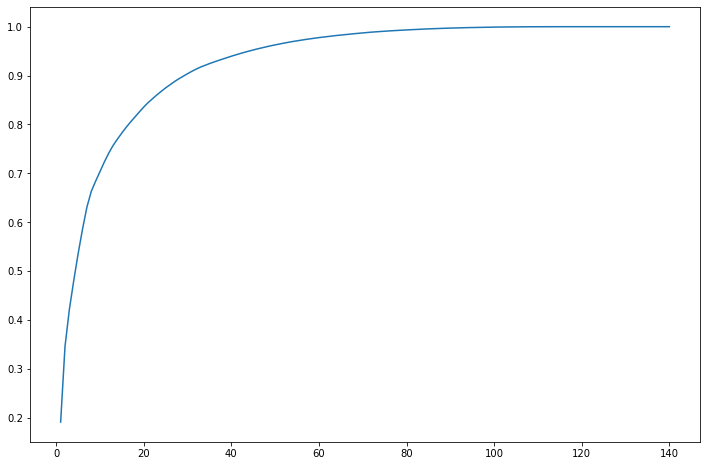

In [76]:
fig = plt.figure(figsize=[12,8])
plt.plot(range(1,len(var_cumu)+1), var_cumu)

## Looking at the scree plot with 50 PCs we have more than 95% of variance explained.

In [77]:
pca_final = IncrementalPCA(n_components=50)

In [78]:
df_train_pca = pca_final.fit_transform(X_resampled)

In [79]:
df_train_pca.shape

(27020, 50)

In [80]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [81]:
corrmat.shape

(50, 50)

In [82]:
corrmat

array([[ 1.00000000e+00, -1.90802995e-07,  1.88403450e-07, ...,
         1.06006042e-05, -2.13116352e-06, -2.95160151e-06],
       [-1.90802995e-07,  1.00000000e+00, -2.42863067e-07, ...,
         8.89837133e-05,  2.30076426e-06, -7.72592613e-06],
       [ 1.88403450e-07, -2.42863067e-07,  1.00000000e+00, ...,
        -1.26310803e-05,  3.53589238e-06,  1.27014860e-04],
       ...,
       [ 1.06006042e-05,  8.89837133e-05, -1.26310803e-05, ...,
         1.00000000e+00, -3.18007773e-02,  5.39380703e-02],
       [-2.13116352e-06,  2.30076426e-06,  3.53589238e-06, ...,
        -3.18007773e-02,  1.00000000e+00, -1.97633793e-02],
       [-2.95160151e-06, -7.72592613e-06,  1.27014860e-04, ...,
         5.39380703e-02, -1.97633793e-02,  1.00000000e+00]])

### Applying the transformation on the test set

In [83]:
X_test.shape

(6304, 70)

In [84]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

/Users/kanchoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- av_rech_amt_data_7
- average_amnt_6_7
- ic_others_6
- ic_others_7
- ic_others_8
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 70 features, but IncrementalPCA is expecting 140 features as input.

## Applying logistic regression on the data on our Principal components

In [ ]:
learner_pca = LogisticRegression()

In [ ]:
model_pca = learner_pca.fit(df_train_pca, y_resampled)

### Making predictions on the test set

In [ ]:
pred_probs_test = model_pca.predict_proba(df_test_pca)